## Данный файл предназначен для того, чтобы разобраться как строить графики по данным из файлов .csv

`Ниже будут представлены полезные ссылки, которые мне помогали с составлением этого файла.`

---> https://pythonru.com/primery/pandas-na-primerah 
-Работа с pandas

---> https://ru.hexlet.io/courses/python-pandas/lessons/index-rules/theory_unit 
-Работа с индексами в pandas

--> https://sky.pro/wiki/pythonustranyaem-indeks-stolbets-v-pandas-csv-bez-key-error/ 
-Устраняем индекс-столбец в pandas CSV: без KeyError

---> https://www.codecamp.ru/blog/drop-index-pandas/ 
-Как удалить столбец индекса в Pandas (с примерами)

---> https://www.youtube.com/watch?v=LLFOZ2vN7ss&t=902s 
-Как оформить текст в Jupyter Notebook с помощью Markdown

### 4.3 Настройка усилителя мощности

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

In [2]:
# Считаем данные из CSV-файла 
# ctrl + / - закомментировать кусок кода
data = pd.read_csv('CH1_CH2_4-3.csv', index_col= False) # Чтение файла в переменную data

C:\Users\User\AppData\Local\Temp\ipykernel_9040\1981684878.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv('CH1_CH2_4-3.csv', index_col= False) # Чтение файла в переменную data


```python
 index_col= False  # сбрасывает индекс при импорте!
``` 
#### `Удалять столбец индекса нужно для корректного соответствия данных !`

### Посмотрим как отображается наша таблица. Выведем её верхнюю часть

In [3]:
data.head()

,Time [s],CH1 [V],CH2 [V];;;;;;
0,2.000000e-09,-0.016,0.128
1,2.000000e-09,0.006,0.084
2,2.000000e-09,0.028,0.036
3,2.000000e-09,0.046,-0.004
4,2.000000e-09,0.064,-0.048


В столбце CH2 [V];;;;;; присутствуют лишние символы (;;;;;;), которые могут мешать правильному извлечению данных._

`Код ниже демонстрирует как можно убрать лишнии символы из столбцов и строк таблицы 
.csv`

In [4]:
# Убираем лишние символы из названий столбцов
data.columns = data.columns.str.replace(r';+', '', regex=True)
# Удаляем лишние символы в строках данных
data = data.replace(r';+', '', regex=True)
# Теперь названия столбцов корректны: 'Time [s]', 'CH1 [V]', 'CH2 [V]'

### Проверим как теперь отображается .csv таблица

In [5]:
data.head()

,Time [s],CH1 [V],CH2 [V]
0,2.000000e-09,-0.016,0.128
1,2.000000e-09,0.006,0.084
2,2.000000e-09,0.028,0.036
3,2.000000e-09,0.046,-0.004
4,2.000000e-09,0.064,-0.048


In [6]:
print(data['CH1 [V]'].head(10))  # Проверим первые 10 значений CH2 после очистки
print(data['CH2 [V]'].head(10))  # Проверим первые 10 значений CH2 после очистки

0   -0.016
1    0.006
2    0.028
3    0.046
4    0.064
5    0.082
6    0.098
7    0.112
8    0.124
9    0.134
Name: CH1 [V], dtype: float64
0    0.128
1    0.084
2    0.036
3   -0.004
4   -0.048
5   -0.092
6   -0.128
7   -0.160
8   -0.184
9   -0.212
Name: CH2 [V], dtype: float64


#### Полученные данные соответствуют своим столбцам, значит можно переходить к построению графиков

### Построение данных

In [12]:
discrete_time = 2.000000e-09 # значение дискрета по времени, взятое из таблицы csv

# Создание вектора времени
time = np.arange(0, 100 * discrete_time, discrete_time)

# Извлечение данных из столбцов CH1 и CH2

ch1 = 9 + 100 * data.iloc[0:100]['CH1 [V]'] # вырезаем строки с нулевой по пятисотую из стобца
                                # CH1 [V]
ch2 = 0.52 + data.iloc[0:100]['CH2 [V]']


#display(ch1.iloc[1000]) # iloc() — метод выбора строк согласно их числовой позиции
                        #loc() — метод выбора данных на основе меток строк


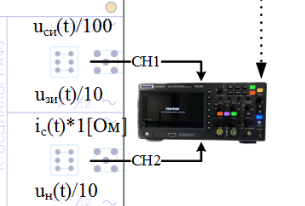 

Так как в 1 канале осциллографа показывается  $Uси / 100$, следовательно все значения нужно умножить на 100, чтобы получить правильные данные в вольтах. __Необходимо прибавить постоянную составляющую 9 В, т.к. её не учитывают данные в таблице csv.__

$Iс$ снимается с 2 канала сразу в амперах сразу в верных значениях, __но необходимо прибавить постоянную составляющую 0.52 А__

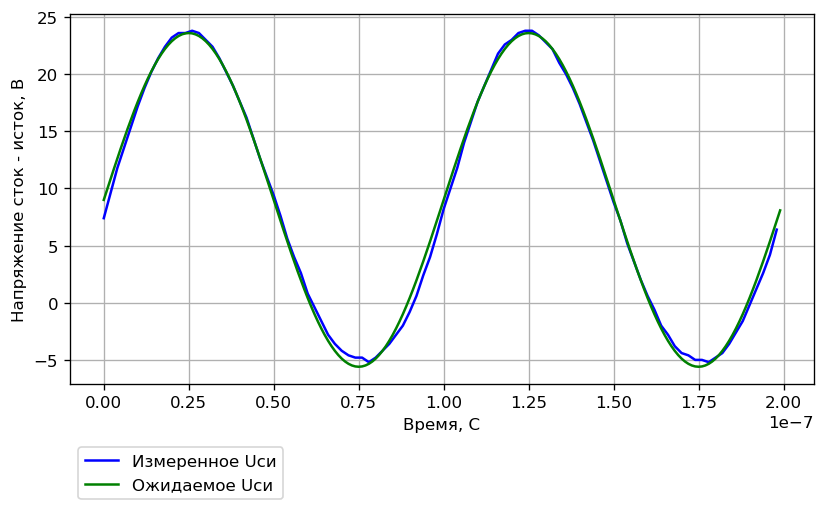

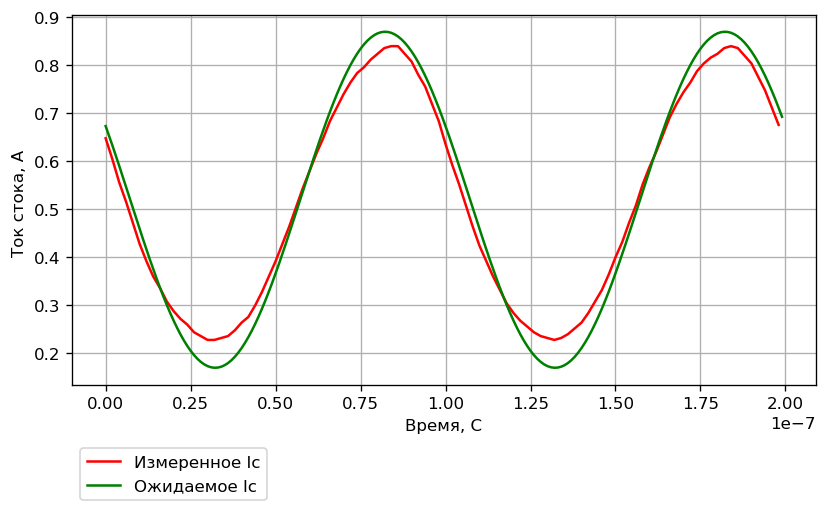

In [37]:
# Параметры синусоиды Uси
amplitude_Uc = 14.6  # Амплитуда в вольтах
frequency = 10e6  # Частота в Гц (10 МГц)
sampling_rate = 1e9  # Частота дискретизации в Гц (например, 100 МГц)
t = np.arange(0, 2e-7, 1/sampling_rate)  # Временная ось (длительность 10 мс)
sinusoid_Uc = 9 + amplitude_Uc * np.sin(2 * np.pi * frequency * t) # Синусоида

# Параметры синусоиды Ic
amplitude_Ic= 0.35  # Амплитуда в вольтах
sinusoid_Ic = 0.52 + amplitude_Ic * np.sin(2 * np.pi * frequency * t + 154*(np.pi/180))


# Построение графиков
plt.figure(figsize=(8, 4), dpi=120)
# Осциллограмма для CH1
plt.plot(time, ch1, label='Измеренное Uси', color='blue')
plt.plot(t, sinusoid_Uc, label='Ожидаемое Uси', color='green')
# Настройка графика
#plt.title('Напряжение сток - исток')
plt.xlabel('Время, С')
plt.ylabel('Напряжение сток - исток, В')
plt.legend(bbox_to_anchor=(0, -0.15), loc='upper left', prop={'size': 10})
plt.grid(True)
# Отображение графика
plt.show()

plt.figure(figsize=(8, 4), dpi=120)
# Осциллограмма для CH2
plt.plot(time, ch2, label='Измеренное Ic', color='red')
plt.plot(t, sinusoid_Ic, label='Ожидаемое Ic', color='green')
# Настройка графика
#plt.title('Ток стока')
plt.xlabel('Время, С')
plt.ylabel('Ток стока, А ')
plt.legend(bbox_to_anchor=(0, -0.15), loc='upper left', prop={'size': 10})
plt.grid(True)
# Отображение графика
plt.show()


### 4.4 Нагрузочные характеристики

### Недонапряжённый режим

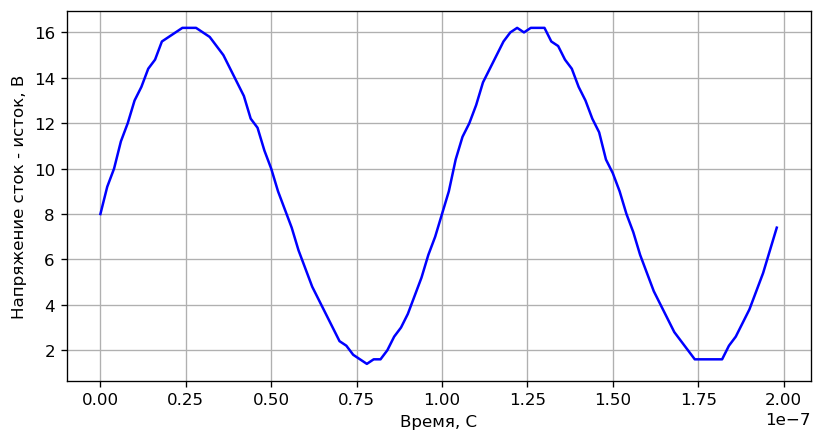

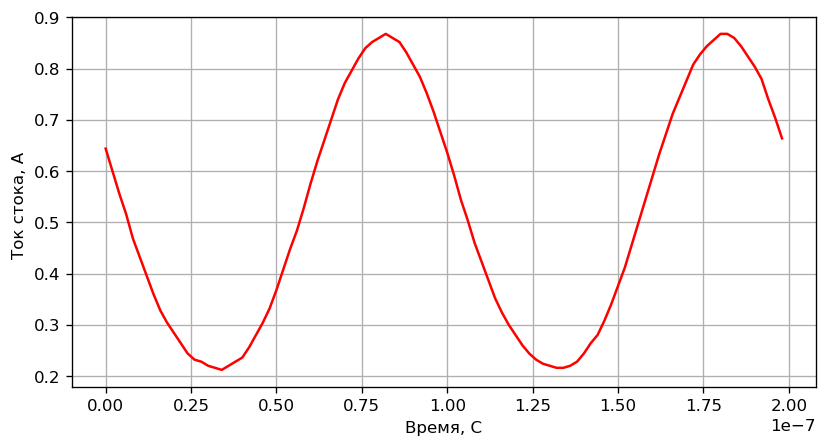

In [46]:
data1 = pd.read_csv('CH1_CH2_4-4-1.csv', index_col= False)
data2 = pd.read_csv('CH1_CH2_4-4-2.csv', index_col= False)


NR_ch1 = 9 + 100 * data1.iloc[0:100]['CH1 [V]'] # вырезаем строки с нулевой по пятисотую из стобца
                                # CH1 [V]
NR_ch2 = 0.52 + data1.iloc[0:100]['CH2 [V]']

# Построение графиков
plt.figure(figsize=(8, 4), dpi=120)
# Осциллограмма для CH1
plt.plot(time, NR_ch1, label='CH1', color='blue')
# Настройка графика
#plt.title('Напряжение сток - исток')
plt.xlabel('Время, С')
plt.ylabel('Напряжение сток - исток, В')
plt.grid(True)
# Отображение графика
plt.show()

plt.figure(figsize=(8, 4), dpi=120)
# Осциллограмма для CH2
plt.plot(time, NR_ch2, label='CH2', color='red')
# Настройка графика
#plt.title('Ток стока')
plt.xlabel('Время, С')
plt.ylabel('Ток стока, А ')
plt.grid(True)
# Отображение графика
plt.show()


### Перенапряжённый режим

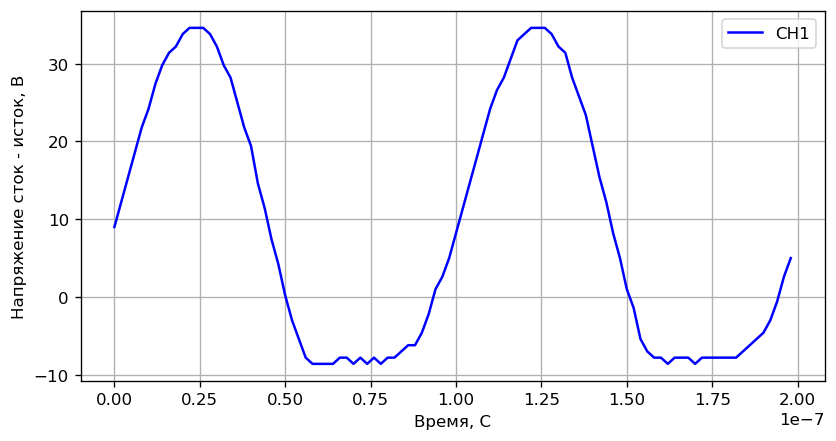

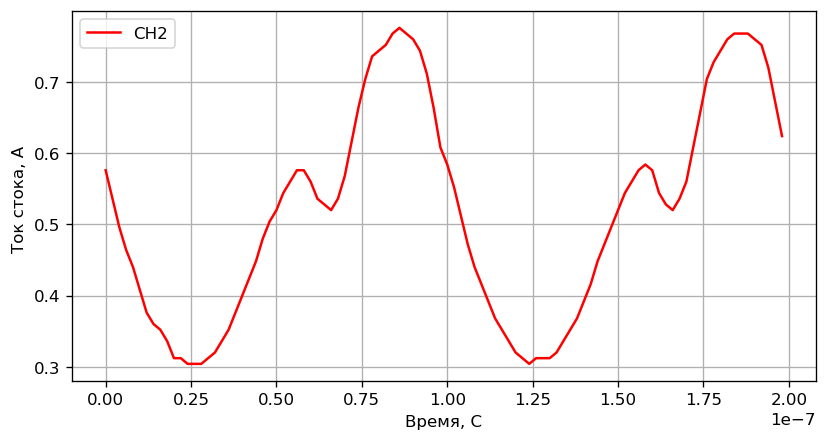

In [45]:
PR_ch1 = 9 + 100 * data2.iloc[0:100]['CH1 [V]'] # вырезаем строки с нулевой по пятисотую из стобца
                                # CH1 [V]
PR_ch2 = 0.52 + data2.iloc[0:100]['CH2 [V]']

# Построение графиков
plt.figure(figsize=(8, 4), dpi=120)
# Осциллограмма для CH1
plt.plot(time, PR_ch1, label='CH1', color='blue')
# Настройка графика
#plt.title('Напряжение сток - исток')
plt.xlabel('Время, С')
plt.ylabel('Напряжение сток - исток, В')
plt.legend()
plt.grid(True)
# Отображение графика
plt.show()

plt.figure(figsize=(8, 4), dpi=120)
# Осциллограмма для CH2
plt.plot(time, PR_ch2, label='CH2', color='red')
# Настройка графика
#plt.title('Ток стока')
plt.xlabel('Время, С')
plt.ylabel('Ток стока, А ')
plt.legend()
plt.grid(True)
# Отображение графика
plt.show()

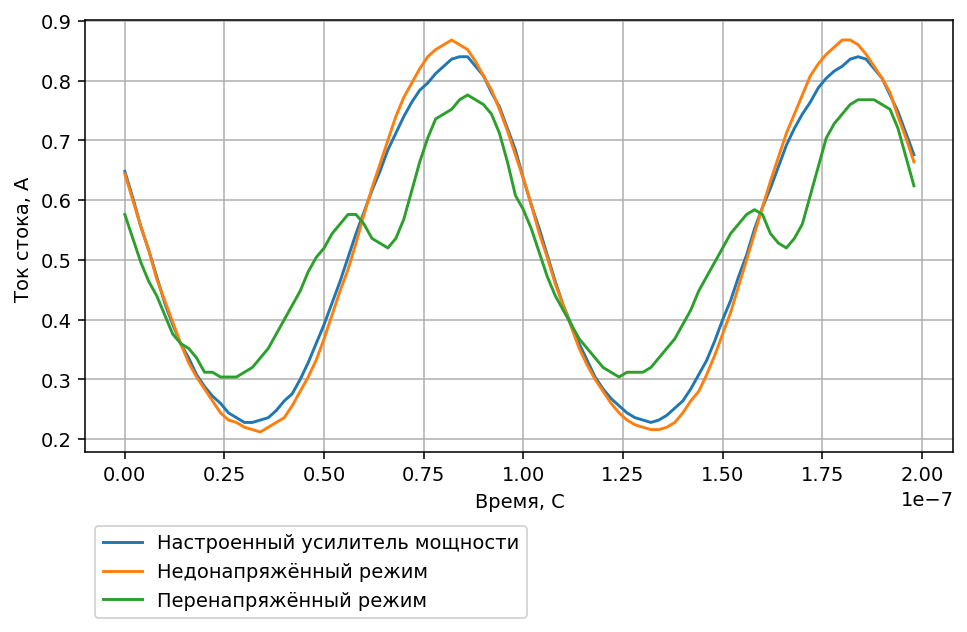

In [51]:
Ic = np.array([ch2, NR_ch2, PR_ch2])
plt.figure(figsize=(8, 4), dpi=140)
plt.grid(True)
time1 = np.arange(0, 100 * discrete_time, discrete_time)
plt.xlabel('Время, С')
plt.ylabel('Ток стока, А ')
plt.legend(['Ic1','Ic2','Ic3'])
plt.show
plt.plot(time1[:], Ic[0], label='Настроенный усилитель мощности')
plt.plot(time1[:], Ic[1], label='Недонапряжённый режим')
plt.plot(time1[:], Ic[2], label='Перенапряжённый режим')
plt.legend(bbox_to_anchor=(0, -0.15), loc='upper left', prop={'size': 10})
plt.show()

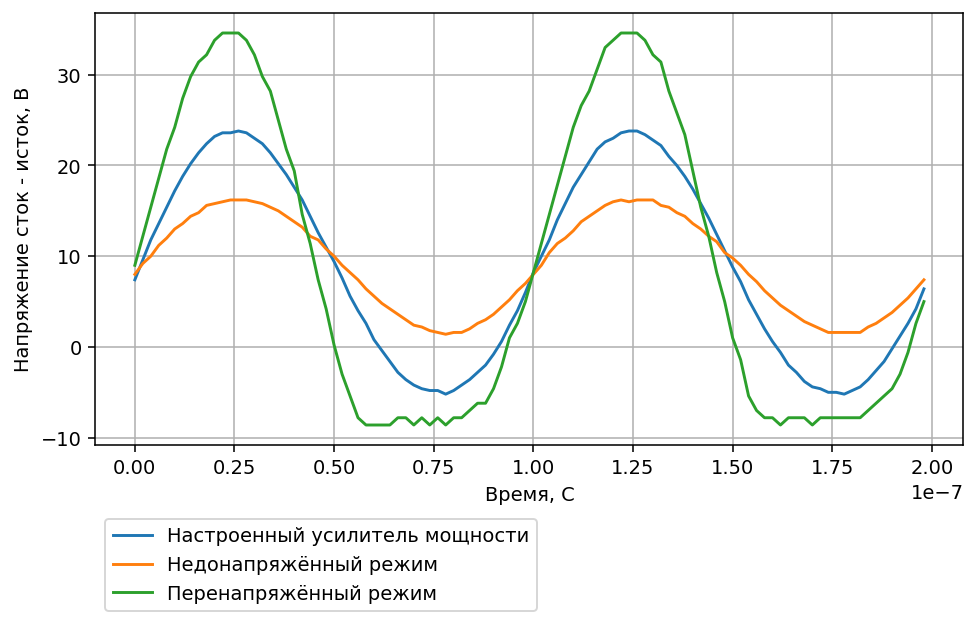

In [53]:
Usi = np.array([ch1, NR_ch1, PR_ch1])
plt.figure(figsize=(8, 4), dpi=140)
plt.grid(True)
time1 = np.arange(0, 100 * discrete_time, discrete_time)
plt.xlabel('Время, С')
plt.ylabel('Напряжение сток - исток, В')
plt.legend(['Ic1','Ic2','Ic3'])
plt.show
plt.plot(time1[:], Usi[0], label='Настроенный усилитель мощности')
plt.plot(time1[:], Usi[1], label='Недонапряжённый режим')
plt.plot(time1[:], Usi[2], label='Перенапряжённый режим')
plt.legend(bbox_to_anchor=(0, -0.15), loc='upper left', prop={'size': 10})
plt.show()

### Поиск второй гармоники тока стока Ic2 в недонапряжённом режиме

In [41]:
from scipy.signal import find_peaks

In [46]:
N = len(NR_ch2)  # Общее количество точек
yf = np.fft.fft(NR_ch2)
xf = np.fft.fftfreq(N, discrete_time)[:N//2]  

1. DC-компонента (нулевая частота) и Найквистова частота (если количество точек чётное) не должны умножаться на 2, так как они не имеют зеркального отображения в спектре.

2. Все остальные частоты имеют зеркальные пары и их амплитуды должны быть умножены на 2 для корректного отображения.

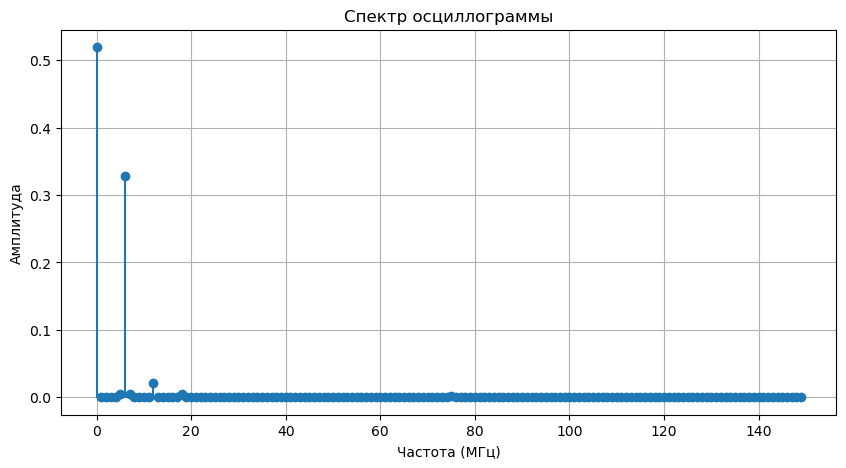

Амплитуда DC-компоненты: 0.5194666666666666


In [48]:
ampl = np.abs(yf[0:N//2]) / N  # Базовое масштабирование
#! Делим все амплитуды на N для нормализации.

# Умножение на 2 для всех частот, кроме DC и Найквистой (если N чётно)
ampl[1:-1] *= 2

#Визуализация спектра2
plt.figure(figsize=(10, 5))
plt.stem(ampl, basefmt='C0')
# plt.plot(xf, ampl)
plt.title('Спектр осциллограммы')
plt.xlabel('Частота (МГц)') #! Какая размерность по оси частот?
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

# Вывод амплитуды DC-компоненты для проверки
print(f'Амплитуда DC-компоненты: {ampl[0]}')




In [64]:
# Нахождение основной частоты
peak_idx = np.argmax(ampl[1:]) + 1  # Игнорируем DC-компоненту
fundamental_freq = xf[peak_idx]
print(f'Основная частота: {fundamental_freq} Гц')

# Определение второй гармоники
second_harmonic_freq = 2 * fundamental_freq
print(f'Вторая гармоника: {second_harmonic_freq} Гц')

# Поиск индекса ближайшей частоты к второй гармонике
idx_second = np.argmin(np.abs(xf - second_harmonic_freq))
second_harmonic_actual_freq = xf[idx_second]  # Точная частота из спектра
second_harmonic_amplitude = ampl[idx_second]
print(f'Амплитуда второй гармоники: {second_harmonic_amplitude:.4f}')




Основная частота: 10000000.0 Гц
Вторая гармоника: 20000000.0 Гц
Амплитуда второй гармоники: 0.0209
